In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas_profiling as pdp
sns.set_style("ticks")

In [11]:
def sortconsole(df):  ##removes incomplete values, and sorts by Platform, then by name
    df1 = df.dropna().sort_values(by =['Platform','Name'])
    df1.index = range(0,len(df1.index))
    return df1


def available(df):   ## adds 4 columns with either 1 or 0, if 0 then the game is not available in the region designated by the column name
    NA = []
    for i in range(0,len(df.index)):
        if df['NA_Sales'][i] == 0.00:
            NA.append(0)
        else:
            NA.append(1)
    df['NA'] = NA
    
    JP = []
    for i in range(0,len(df.index)):
        if df['JP_Sales'][i] == 0.00:
            JP.append(0)
        else:
            JP.append(1)
    df['JP'] = JP
    
    EU = []
    for i in range(0,len(df.index)):
        if df['EU_Sales'][i] == 0.00:
            EU.append(0)
        else:
            EU.append(1)
    df['EU'] = EU
    
    OTHER = []
    for i in range(0,len(df.index)):
        if df['Other_Sales'][i] == 0.00:
            OTHER.append(0)
        else:
            OTHER.append(1)
    df['OTHER'] = OTHER
    
    
    
    return df

research questions:
 - How many games are available on different consoles?
 - How do User/critic scores vary amongst the different games on the consoles
 - Other differences between data for different consoles
 
Basic description:
The raw data was obtained from [kaggle]("https://www.kaggle.com/rush4ratio/video-game-sales-with-ratings"), and is a user compiled data set which extends a scrape already performed by Metacritic. It includes over 16,000 entries, of which ~6,900 have all aspects complete. Each entry features a videogame and the console/platform it was released on, and entries include release dates from 1980 to 2016.
 

In [12]:
df = pd.read_csv("https://github.com/data301-2020-winter2/course-project-group_1019/blob/main/data/raw/Video_Games_Sales_as_at_22_Dec_2016.csv?raw=true")
df = sortconsole(df)
df = available(df)

Text(0.5, 1.0, 'Number of games available on each console')


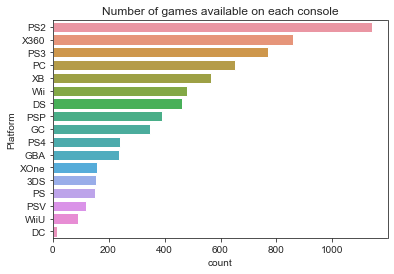

In [13]:

plot = sns.countplot(y = 'Platform',data = df,order = df['Platform'].value_counts().index).set_title("Number of games available on each console")
print(plot)

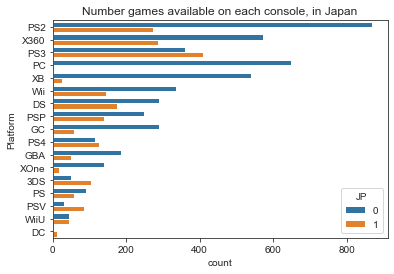

In [14]:
plot = sns.countplot(y = 'Platform',data = df, order = df['Platform'].value_counts().index, hue = 'JP', hue_order = df['JP'].value_counts().index).set_title("Number games available on each console, in Japan")

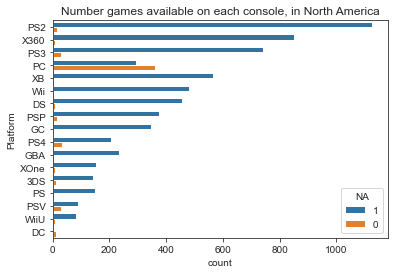

In [15]:
plot = sns.countplot(y = 'Platform',data = df, order = df['Platform'].value_counts().index, hue = 'NA', hue_order = df['NA'].value_counts().index).set_title("Number games available on each console, in North America")

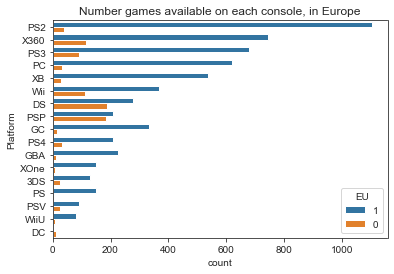

In [16]:
plot = sns.countplot(y = 'Platform',data = df, order = df['Platform'].value_counts().index, hue = 'EU', hue_order = df['EU'].value_counts().index).set_title("Number games available on each console, in Europe")

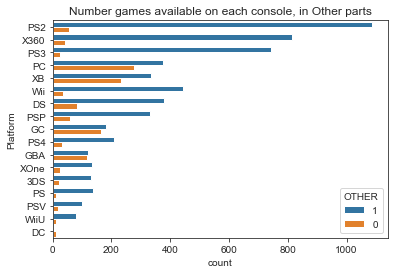

In [17]:
plot = sns.countplot(y = 'Platform',data = df, order = df['Platform'].value_counts().index, hue = 'OTHER', hue_order = df['OTHER'].value_counts().index).set_title("Number games available on each console, in Other parts")


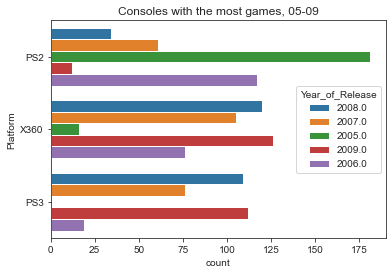

In [40]:
plot = sns.countplot(hue = 'Year_of_Release',data = df, hue_order = df.Year_of_Release.value_counts().iloc[:5].index, y = df.Platform, order = df.Platform.value_counts().iloc[:3].index).set_title("Consoles with the most games, 05-09")
